In [1]:
import torch;import torch.nn as nn;import torch.nn.functional as F
torch.set_default_tensor_type(torch.cuda.FloatTensor)
from layer.modules.ssd import SSD
import imgaug as ia
import imgaug.augmenters as iaa

import os
import cv2
import matplotlib.pyplot as plt

In [10]:
net = SSD()
if os.path.isfile('./testmodel.pkl'):
    net.load_state_dict(torch.load('./testmodel.pkl'))
    print('loaded!')

aug = iaa.Scale(300)
img = cv2.imread('./VOCdevkit/VOC2007/JPEGImages/000005.jpg')[...,::-1]
img_aug = aug.augment_image(img)

loaded!


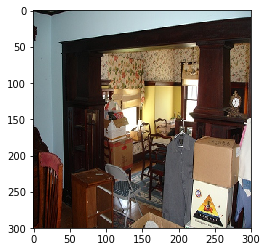

In [11]:
plt.imshow(img_aug)

In [12]:
ten_img = torch.tensor(img_aug).unsqueeze(0).permute(0,3,1,2)

In [13]:
a = net(ten_img.float())

In [15]:
if os.path.isfile('./testresult.pkl'):
    b = torch.load('./testresult.pkl')
    torch.eq(a[1],b[1]).all()

In [9]:
torch.save(a,'./testresult.pkl')
torch.save(net.state_dict(),'./testmodel.pkl')